# CVAI Exercise Digital Photography 2

In this exercise we will continue to carry out some of the image manipulation that are often done as part of the processing in the camera.


In [1]:
import skimage
import numpy as np

# for displaying images in jupyter
import matplotlib as mpl
from matplotlib import pyplot as plt

# this makes the images a bit larger
mpl.rcParams['figure.dpi']= 200
plt.rcParams['figure.figsize'] = [5,4]

# plots directly in the notebook
%matplotlib inline 

# if you have a high-dpi monitor
%config InlineBackend.figure_format = 'retina' 

path = '/exchange/cvai/images/'

## Exercise 1: White balance

We have looked at white balance in the lecture. The problem that images taken under different lighting conditions do not look the same on a photograph. When we see the scene with our own eyes, the brain will adjust so that we will still recognise the colors. However, when looking at an image that will not be done.

We will load different example images taken from the wikipedia page about color balance: https://en.wikipedia.org/wiki/Color_balance. The images are by Alex1ruff - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=48366925


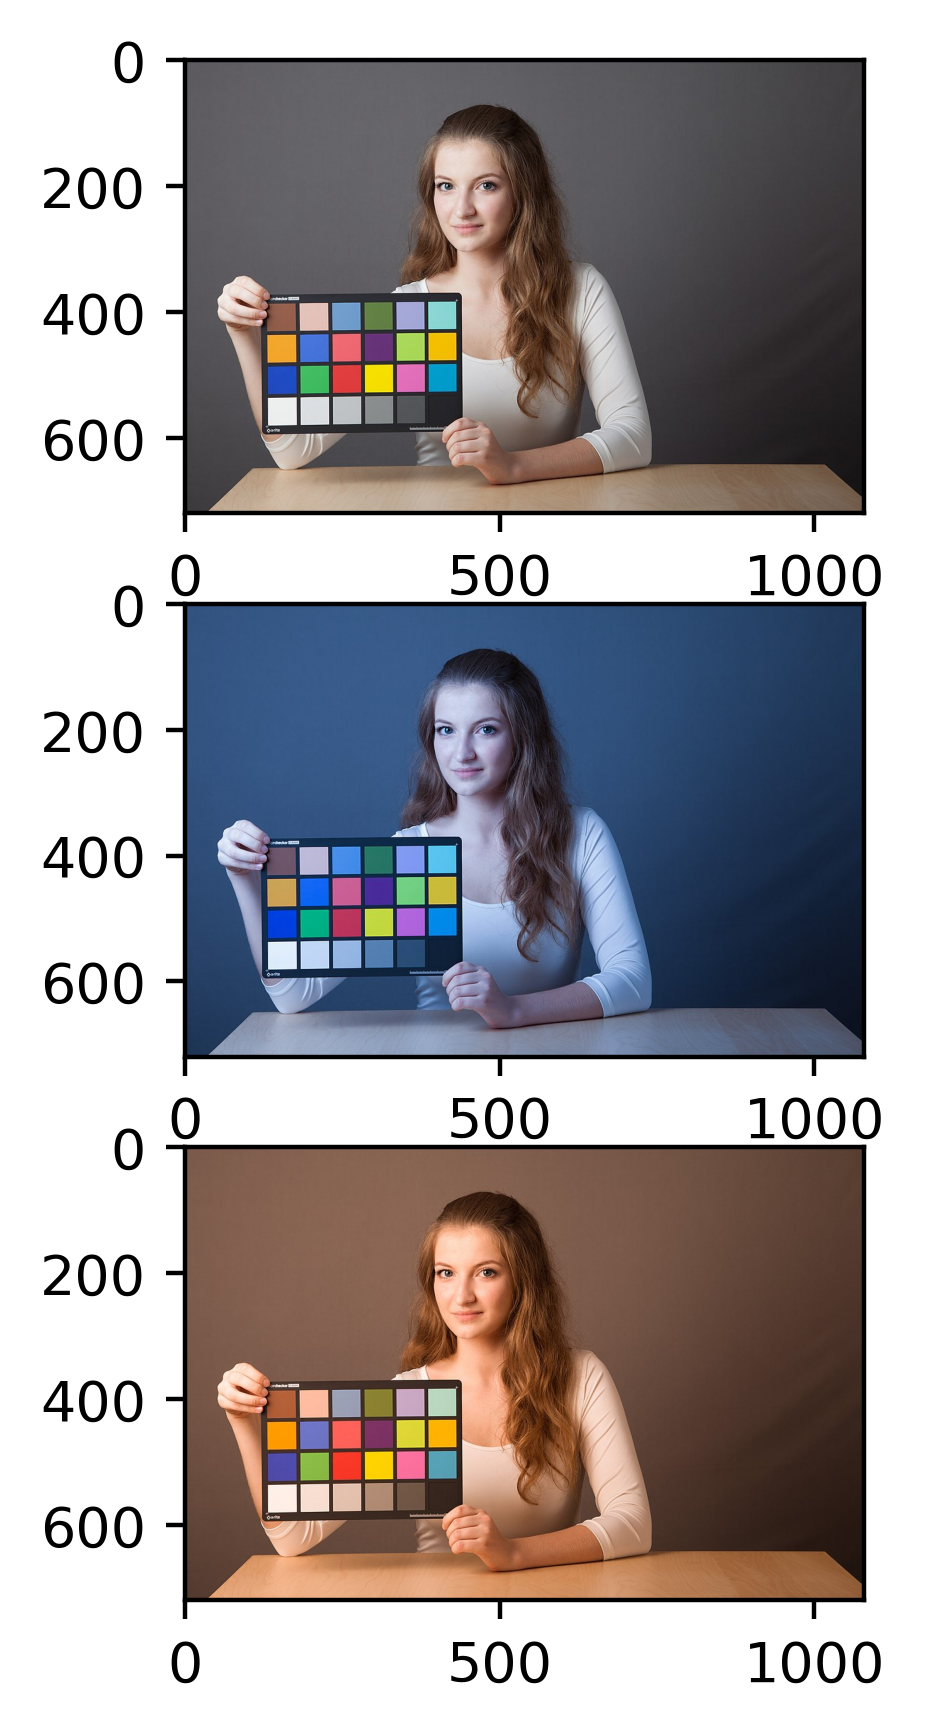

In [2]:
# images can be read using imread, this will result in a 3 channel uint8 image
image_neutral = skimage.io.imread(path + '1080px-Wb_girl_neutral.jpg')
image_tungsten = skimage.io.imread(path + '1080px-Wb_girl_tungsten.jpg')
image_cloudy = skimage.io.imread(path + '1080px-Wb_girl_cloudy.jpg')

plt.rcParams['figure.figsize'] = [5,5]
plt.subplot(3,1,1)
plt.imshow(image_neutral)
plt.subplot(3,1,2)
plt.imshow(image_tungsten)
plt.subplot(3,1,3)
plt.imshow(image_cloudy)

We will try do adapt the blueish tungsten image first. As the image contains a color checker, we can use that to find the ground truth. The color checker is the following one from X-Rite:
https://www.xrite.com/categories/calibration-profiling/colorchecker-classic

According to that website, the grey values in the lower 6 squares are approximately gray values with the values 241, 202, 163, 121, 82, 48. I.e. the brightest square has the color (241, 241, 241).

We would like to extract and average a 20x20 pixel area from each of the 6 squares. You might want to open the image in an image processing program to better find the coordinates and display the found squares to verify. Remember that numpy uses the first coordinate along the y axis.

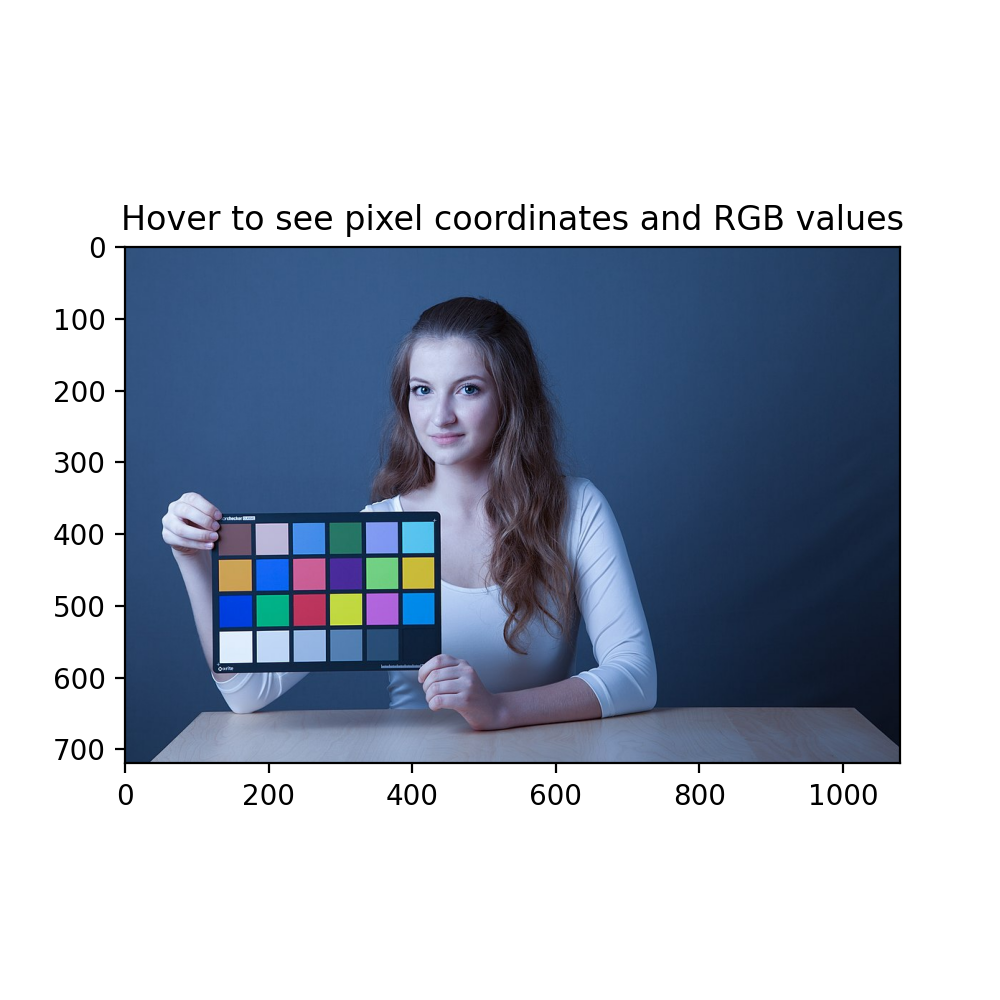

In [18]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

if image_tungsten.max() <= 1.0:
    image_tungsten = (image_tungsten * 255).astype(np.uint8)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(image_tungsten)
ax.set_title("Hover to see pixel coordinates and RGB values")

def on_hover(event):
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        if 0 <= x < image_tungsten.shape[1] and 0 <= y < image_tungsten.shape[0]:
            rgb = image_tungsten[y, x, :3]
            ax.set_title(f"Pixel: ({x}, {y}) - RGB: {tuple(rgb)}")
            fig.canvas.draw_idle()
            
fig.canvas.mpl_connect("motion_notify_event", on_hover)

plt.show()

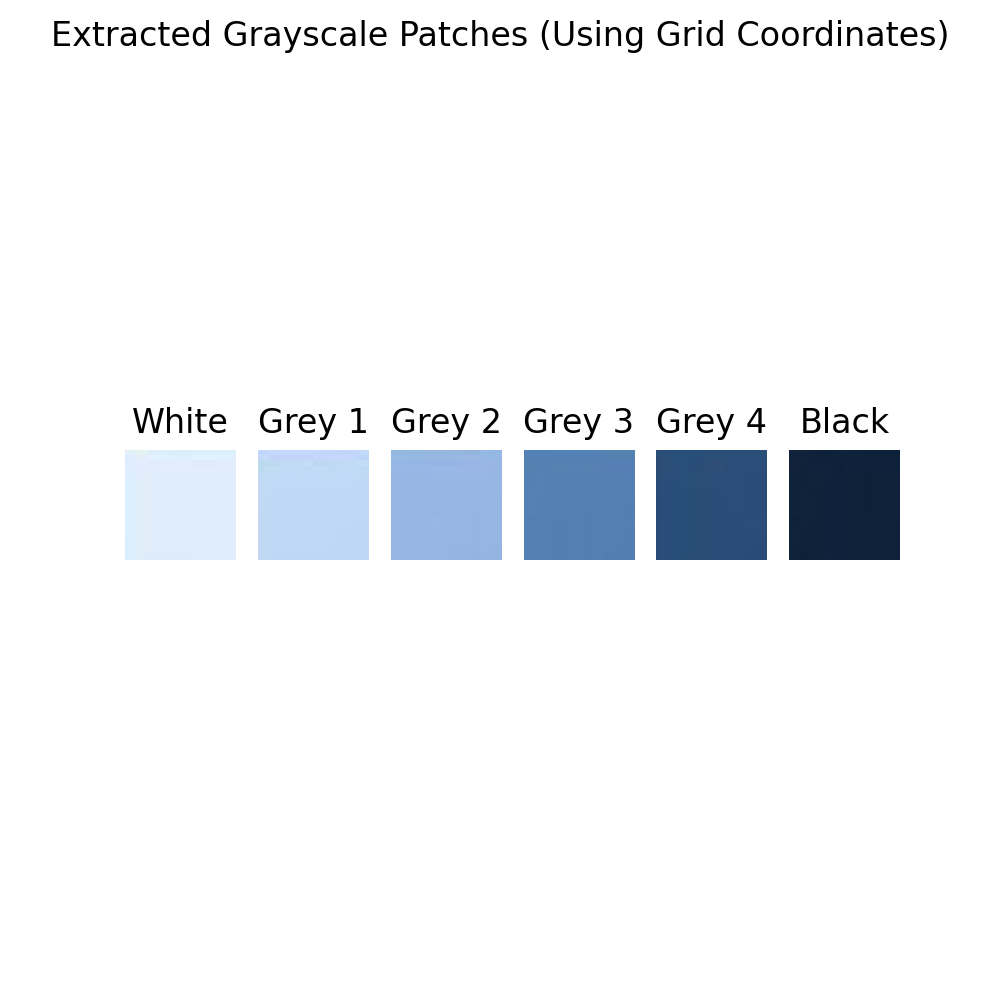

((540, 560, 140, 160),
 (540, 560, 190, 210),
 (540, 560, 240, 260),
 (540, 560, 290, 310),
 (540, 560, 340, 360),
 (540, 560, 390, 410))

In [19]:
plt.close('all')

patch_size = 20

white_patch_coords = (540, 560, 140, 160)
grey_1_patch_coords = (540, 560, 190, 210)
grey_2_patch_coords = (540, 560, 240, 260)
grey_3_patch_coords = (540, 560, 290, 310)
grey_4_patch_coords = (540, 560, 340, 360)
black_patch_coords = (540, 560, 390, 410)

white_patch = image_tungsten[white_patch_coords[0]:white_patch_coords[1], white_patch_coords[2]:white_patch_coords[3], :]
grey_1_patch = image_tungsten[grey_1_patch_coords[0]:grey_1_patch_coords[1], grey_1_patch_coords[2]:grey_1_patch_coords[3], :]
grey_2_patch = image_tungsten[grey_2_patch_coords[0]:grey_2_patch_coords[1], grey_2_patch_coords[2]:grey_2_patch_coords[3], :]
grey_3_patch = image_tungsten[grey_3_patch_coords[0]:grey_3_patch_coords[1], grey_3_patch_coords[2]:grey_3_patch_coords[3], :]
grey_4_patch = image_tungsten[grey_4_patch_coords[0]:grey_4_patch_coords[1], grey_4_patch_coords[2]:grey_4_patch_coords[3], :]
black_patch = image_tungsten[black_patch_coords[0]:black_patch_coords[1], black_patch_coords[2]:black_patch_coords[3], :]

fig, axes = plt.subplots(1, 6, figsize=(5, 5))
patches = [white_patch, grey_1_patch, grey_2_patch, grey_3_patch, grey_4_patch, black_patch]
titles = ["White", "Grey 1", "Grey 2", "Grey 3", "Grey 4", "Black"]

for ax, patch, title in zip(axes, patches, titles):
    ax.imshow(patch)
    ax.set_title(title)
    ax.axis("off")

plt.suptitle("Extracted Grayscale Patches (Using Grid Coordinates)")
plt.show()

white_patch_coords, grey_1_patch_coords, grey_2_patch_coords, grey_3_patch_coords, grey_4_patch_coords, black_patch_coords


In [20]:
patch_size = 20

white_patch_coords = (540, 560, 140, 160)
grey_1_patch_coords = (540, 560, 190, 210)
grey_2_patch_coords = (540, 560, 240, 260)
grey_3_patch_coords = (540, 560, 290, 310)
grey_4_patch_coords = (540, 560, 340, 360)
black_patch_coords = (540, 560, 390, 410)

white_patch = image_tungsten[white_patch_coords[0]:white_patch_coords[1], white_patch_coords[2]:white_patch_coords[3], :]
grey_1_patch = image_tungsten[grey_1_patch_coords[0]:grey_1_patch_coords[1], grey_1_patch_coords[2]:grey_1_patch_coords[3], :]
grey_2_patch = image_tungsten[grey_2_patch_coords[0]:grey_2_patch_coords[1], grey_2_patch_coords[2]:grey_2_patch_coords[3], :]
grey_3_patch = image_tungsten[grey_3_patch_coords[0]:grey_3_patch_coords[1], grey_3_patch_coords[2]:grey_3_patch_coords[3], :]
grey_4_patch = image_tungsten[grey_4_patch_coords[0]:grey_4_patch_coords[1], grey_4_patch_coords[2]:grey_4_patch_coords[3], :]
black_patch = image_tungsten[black_patch_coords[0]:black_patch_coords[1], black_patch_coords[2]:black_patch_coords[3], :]

plt.close('all')

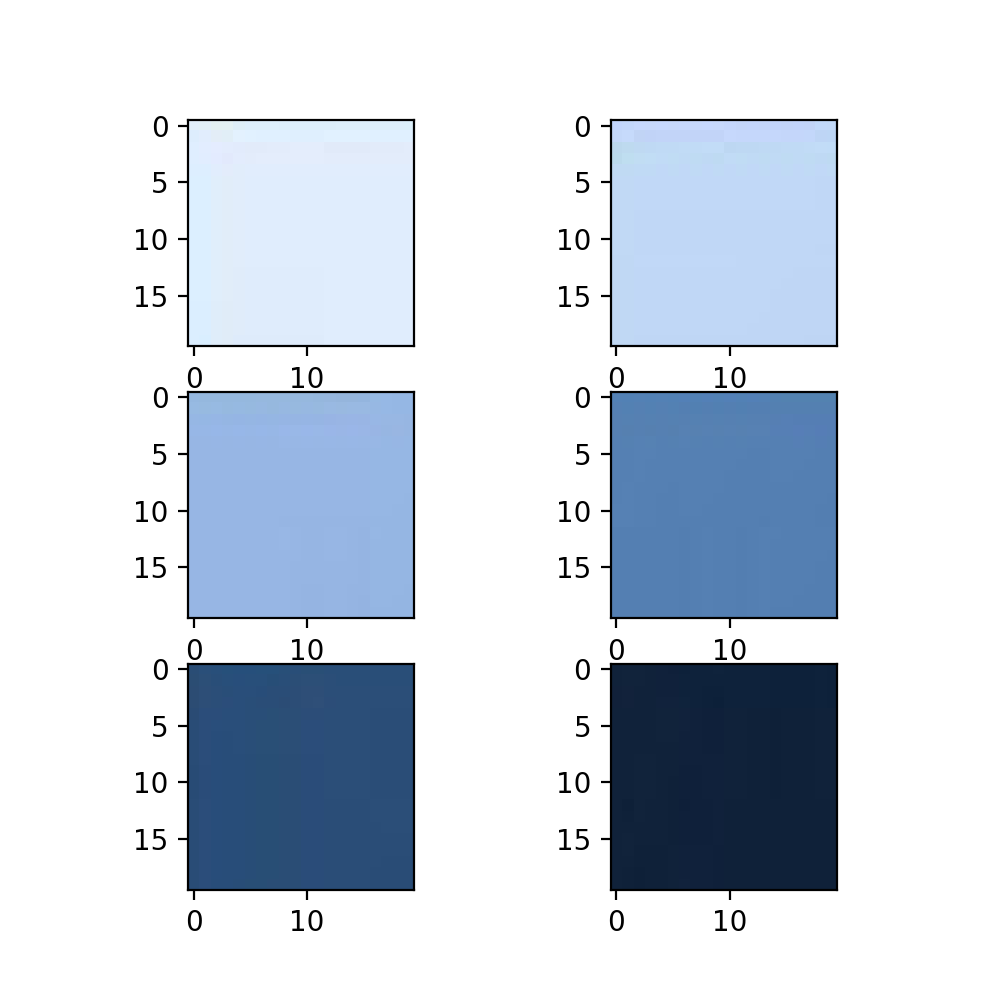

In [21]:
plt.subplot(3,2,1)
plt.imshow(white_patch)
plt.subplot(3,2,2)
plt.imshow(grey_1_patch)
plt.subplot(3,2,3)
plt.imshow(grey_2_patch)
plt.subplot(3,2,4)
plt.imshow(grey_3_patch)
plt.subplot(3,2,5)
plt.imshow(grey_4_patch)
plt.subplot(3,2,6)
plt.imshow(black_patch)

As we can see, the patches are quite blueish. Now we should calculate the average color of the patches so that we can compare them to the real values. You might have to check numpy how to average along more than one axis.

In [22]:
# calculate the average values of the 6 patches

# initialize variables 
white_tungsten = [0, 0, 0]
grey_1_tungsten = [0, 0, 0]
grey_2_tungsten = [0, 0, 0]
grey_3_tungsten = [0, 0, 0]
grey_4_tungsten = [0, 0, 0]
black_tungsten = [0, 0, 0]

white_tungsten[0] = np.mean(white_patch[:,:,0])
white_tungsten[1] = np.mean(white_patch[:,:,1])
white_tungsten[2] = np.mean(white_patch[:,:,2])

grey_1_tungsten[0] = np.mean(grey_1_patch[:,:,0])
grey_1_tungsten[1] = np.mean(grey_1_patch[:,:,1])
grey_1_tungsten[2] = np.mean(grey_1_patch[:,:,2])

grey_2_tungsten[0] = np.mean(grey_2_patch[:,:,0])
grey_2_tungsten[1] = np.mean(grey_2_patch[:,:,1])
grey_2_tungsten[2] = np.mean(grey_2_patch[:,:,2])

grey_3_tungsten[0] = np.mean(grey_3_patch[:,:,0])
grey_3_tungsten[1] = np.mean(grey_3_patch[:,:,1])
grey_3_tungsten[2] = np.mean(grey_3_patch[:,:,2])

grey_4_tungsten[0] = np.mean(grey_4_patch[:,:,0])
grey_4_tungsten[1] = np.mean(grey_4_patch[:,:,1])
grey_4_tungsten[2] = np.mean(grey_4_patch[:,:,2])

black_tungsten[0] = np.mean(black_patch[:,:,0])
black_tungsten[1] = np.mean(black_patch[:,:,1])
black_tungsten[2] = np.mean(black_patch[:,:,2])

print(white_tungsten, grey_1_tungsten, grey_2_tungsten, grey_3_tungsten, grey_4_tungsten, black_tungsten)

[np.float64(223.7775), np.float64(237.125), np.float64(252.4075)] [np.float64(192.3375), np.float64(215.47), np.float64(246.045)] [np.float64(150.53), np.float64(182.1025), np.float64(227.4525)] [np.float64(84.31), np.float64(127.4325), np.float64(178.355)] [np.float64(41.69), np.float64(77.315), np.float64(119.5025)] [np.float64(15.26), np.float64(33.34), np.float64(57.85)]


In [23]:
np.testing.assert_allclose(white_tungsten,[223, 237, 252], atol=3.0)
np.testing.assert_allclose(grey_1_tungsten,[192, 215, 246], atol=3.0)
np.testing.assert_allclose(grey_2_tungsten,[150, 181, 227], atol=3.0)
np.testing.assert_allclose(grey_3_tungsten,[84, 127, 178], atol=3.0)
np.testing.assert_allclose(grey_4_tungsten,[41, 77, 119], atol=3.0)
np.testing.assert_allclose(black_tungsten,[15, 33, 57], atol=3.0)

### Color Correction

We now want to implement the color correction. One simple solution is to scale the color channels linearly in RGB so that the correct color is achieved for a given reference color.

Write a function that takes an image, a reference color, the same color as it occurs in the image (i.e. what we have measured) and calculates the color corrected image.


In [24]:
def color_correction(image: np.ndarray, ref_color, ref_color_measured) -> np.ndarray:
    ref_color = np.array(ref_color, dtype=np.float32)
    ref_color_measured = np.array(ref_color_measured, dtype=np.float32)

    scale_factors = ref_color / ref_color_measured
    corrected_image = image.astype(np.float32) * scale_factors  # Broadcast scaling
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)

    return corrected_image

In [25]:
# call the correction with one of the gray values (you can also try some of the other color, grey seems to work better
# than white as it will give a stronger correction )
image_corrected = color_correction(image_tungsten, [163,163,163],grey_2_tungsten)
assert image_corrected is not None

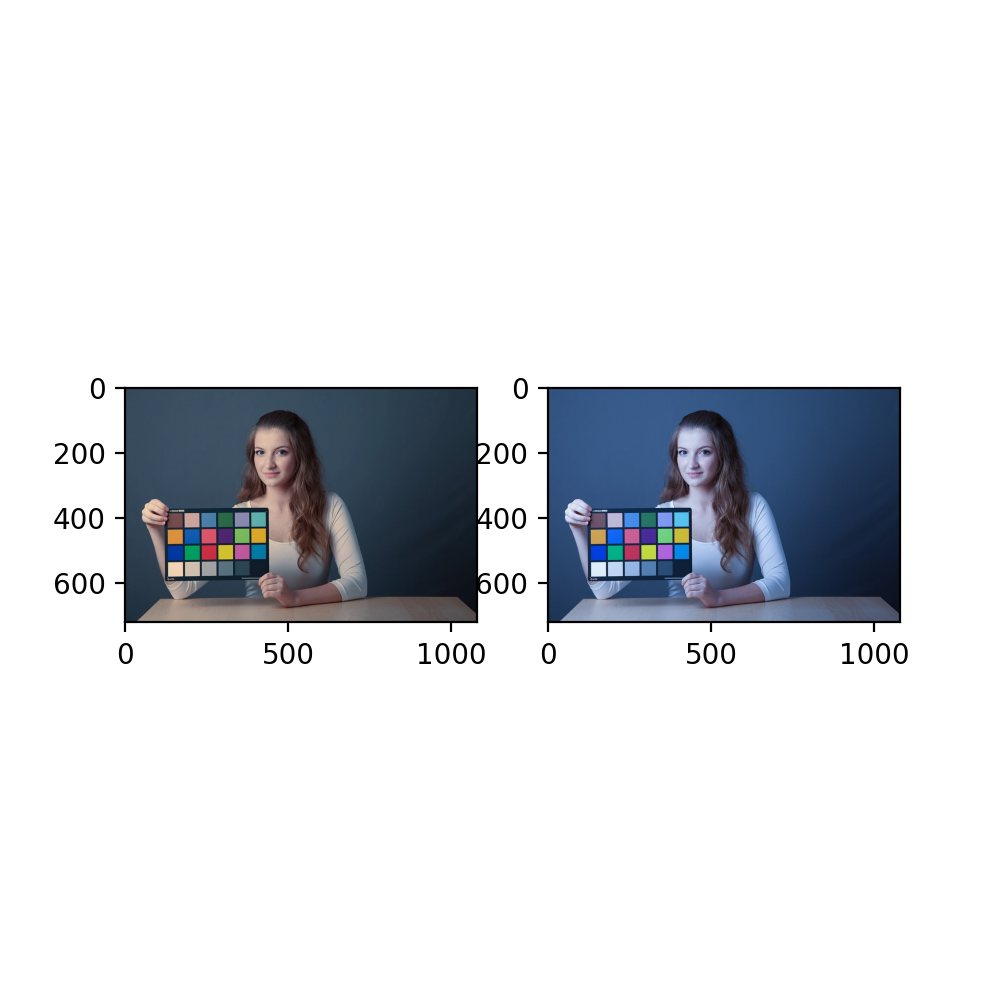

In [26]:
plt.close('all')
plt.rcParams['figure.figsize'] = [5,5]
plt.subplot(1,2,1)
plt.imshow(image_corrected)
plt.subplot(1,2,2)
plt.imshow(image_tungsten)
plt.show()

The image does not yet look completely like the neutral image, but much of the blueish color has gone the the image looks much more realistic.

You can try to correct the other (cloudy) image the same way.

## Exercise 2: HDR Imaging

In this exercise we will look at creating an HDR image out of images taken with different exposure settings. We will first use the image of the St. Louis arc which are available at Wikimadia Commons under the following license:

Kevin McCoy, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons

The images have been downsampled from the original size for faster processing. Lets first load and display the 4 images.

In [27]:
image_0 = skimage.io.imread(path + '960px-StLouisArchMultExpEV-4.72.JPG')
image_1 = skimage.io.imread(path + '960px-StLouisArchMultExpEV-1.82.JPG')
image_2 = skimage.io.imread(path + '960px-StLouisArchMultExpEV+1.18.JPG')
image_3 = skimage.io.imread(path + '960px-StLouisArchMultExpEV+4.09.JPG')

plt.close('all')

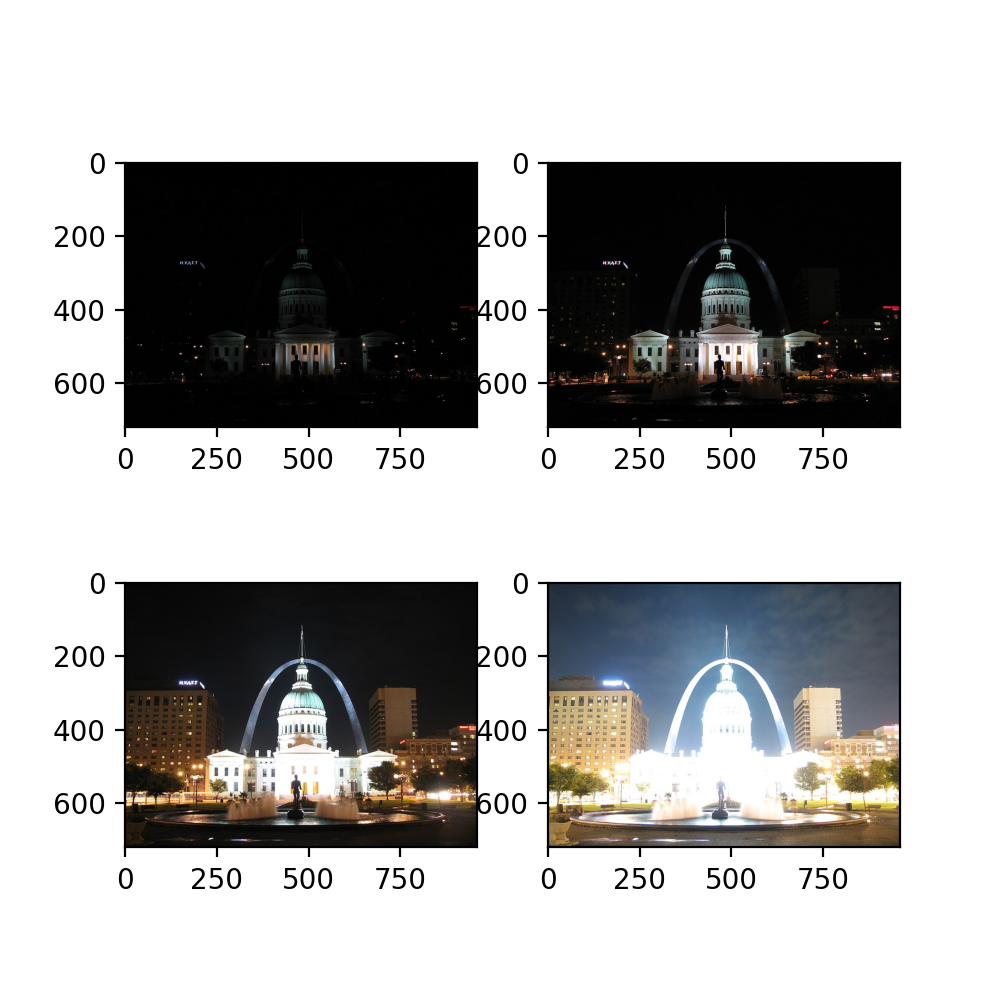

In [28]:
plt.rcParams['figure.figsize'] = [5,5]
plt.subplot(2,2,1)
plt.imshow(image_0)
plt.subplot(2,2,2)
plt.imshow(image_1)
plt.subplot(2,2,3)
plt.imshow(image_2)
plt.subplot(2,2,4)
plt.imshow(image_3)

Write a function that combines the images to produce one with larger dynamic range. In the resulting image, you will want to see some details from the dark areas without having the bright areas overexposed.

As outlined in the course, you might only want to use the pixels in a specific location from some images, but not from others. Try to use only linear combination for the first approach, even as the images are jpeg.

Is there much difference if you mask out pixels from some of the images or not?


In [29]:
plt.close('all')

def combine_hdr_linear(image_list: list, weights=None) -> np.ndarray:
    images = [img.astype(np.float32) / 255.0 for img in image_list]

    num_images = len(images)
    if weights is None:
        weights = [1.0 / num_images] * num_images

    weights = np.array(weights) / np.sum(weights)

    hdr_image = np.zeros_like(images[0])
    for img, weight in zip(images, weights):
        hdr_image += img * weight

    hdr_image = np.clip(hdr_image, 0, 1)

    return (hdr_image * 255).astype(np.uint8)

linear_hdr = combine_hdr_linear([image_0, image_1, image_2, image_3])

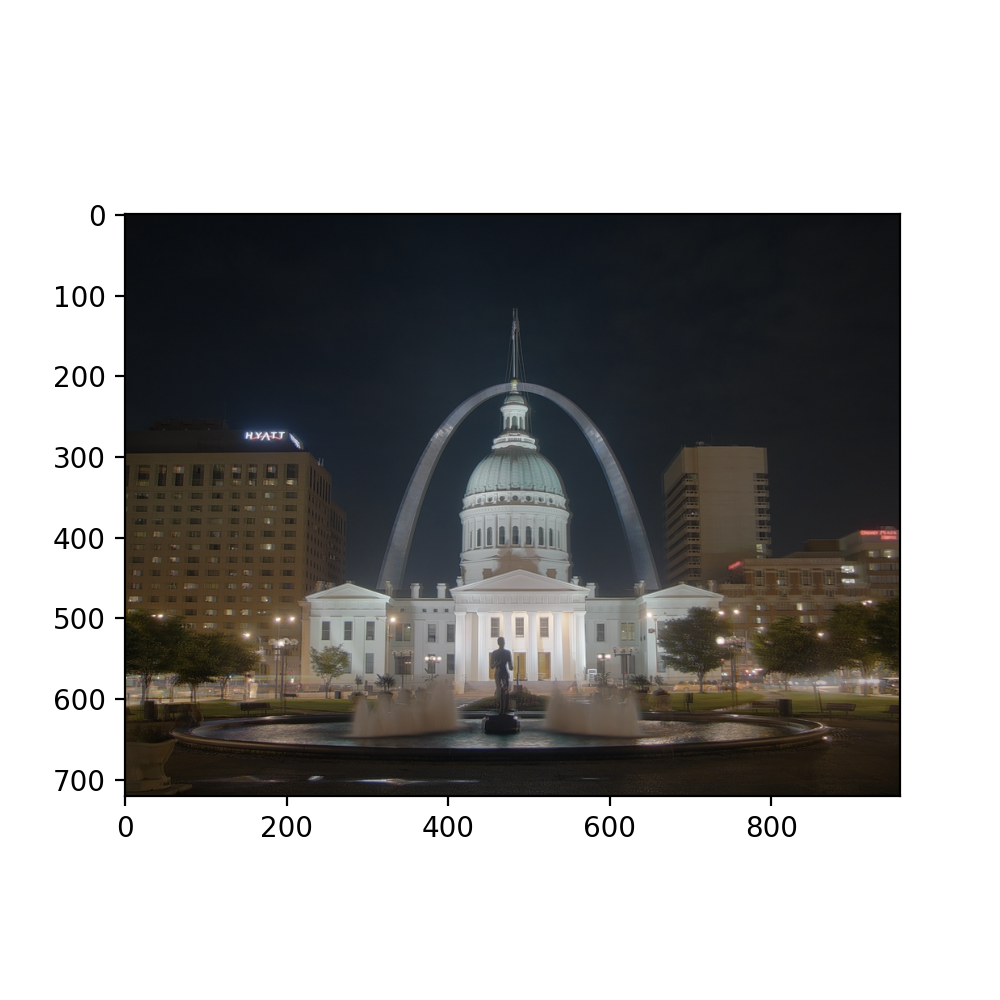

In [15]:
assert linear_hdr is not None
plt.imshow(linear_hdr)

As you can see, there is one problem with the images, they do not seem to be fully aligned. We will look how to correct this problem in the next lecture.

This will be all for the exercise.

Please feel free to experiment a bit more with the images.